$s$

In [1]:
import ipywidgets as widgets
out = widgets.Output()
with out:
    
    %bookmark 'model_dir'
    current_dir = %pwd
    while 'models' in current_dir:
        %cd ..
        current_dir = %pwd
    %bookmark 'base_dir'
    %cd source_code
    out.clear_output()
%run base
%run gui_v6
with out:
    %cd ..
    %cd models/st100_v1/front_suspension
    out.clear_output()


In [2]:
m=model()
m.show()

## VEHICLE DYNAMICS MODELING AND SIMULATION TOOL

In [8]:
m.show_data_flow()

Output()

In [3]:
m.bodies['rbs_chassis'].typ

'floating'

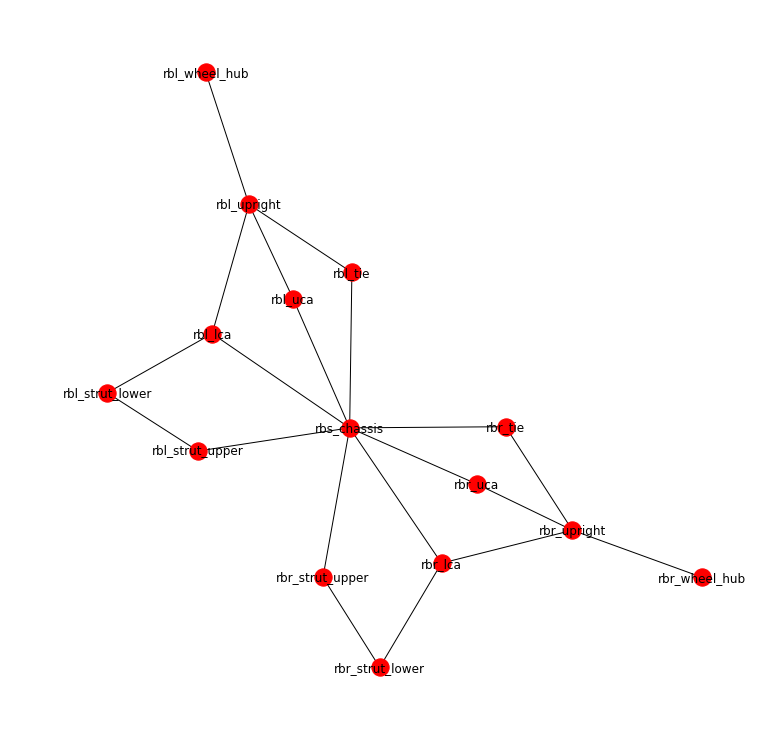

In [3]:
plt.figure(figsize=(10,10))
layout=nx.spring_layout(m.topology)
nx.draw(m.topology,pos=layout,with_labels=True)
plt.show()

In [12]:
m.bodies['rbl_uca'].typ

'floating'

In [15]:
m.object_successors('rbl_strut_upper')

Output()

In [14]:
m.object_predecessors('jcl_uca_rev')

Output()

In [2]:
steering=model()
steering.show()

## VEHICLE DYNAMICS MODELING AND SIMULATION TOOL

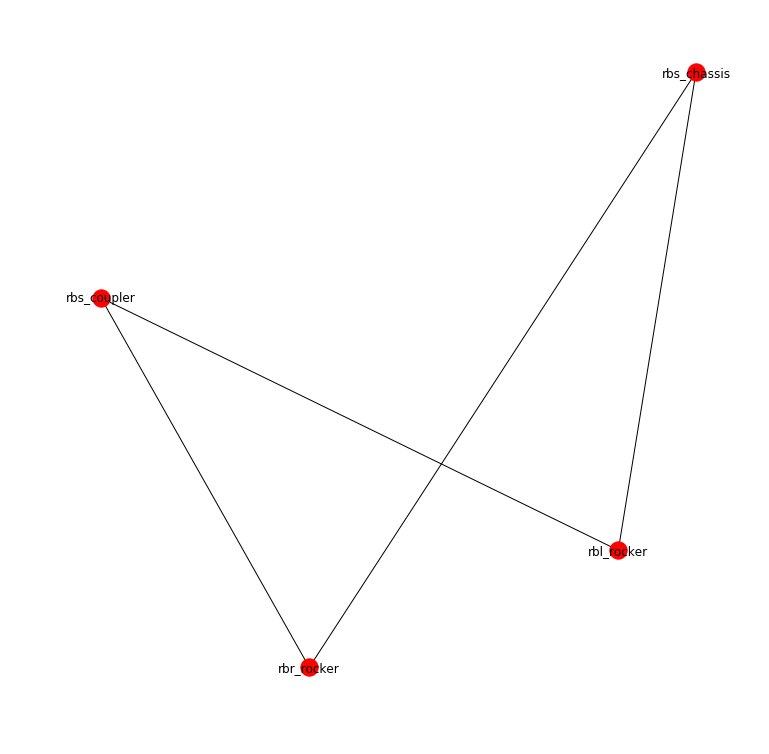

In [3]:
steering.draw_topology()

In [3]:
steer_actuator = rotational_drive('act',steering.joints['jcl_rocker_chassis'])
#steer_actuator = absolute_locating('act',steering.bodies['rbl_rocker'],'y')

In [4]:
ac=pd.Series([steer_actuator],index=['act'])
q0   = pd.concat([i.dic    for i in steering.bodies])
topology_writer(steering.bodies,steering.joints,ac,[],'steering_data3')

t=np.linspace(0,2*np.pi,50)
steer_actuator.pos_array=30*np.sin(t)
#steer_actuator.pos_array=steering.bodies['rbl_rocker'].R.y+50*np.sin(4*t)



pos_df,vel_df,acc_df,itr=kds(steering.bodies,steering.joints,ac,'steering_data3',t)


Running System Kinematic Analysis:
Progress: [===                      ] 12% of 50 steps.

C:\Users\khaled.ghobashy\Desktop\asurt_cdt\source_code\mbs_objects\bodies_inertia.py:216: RuntimeWarning: overflow encountered in double_scalars
  eq=(e0**2)+(e1**2)+(e2**2)+(e3**2)-1
C:\Users\khaled.ghobashy\Desktop\asurt_cdt\source_code\mbs_objects\bodies_inertia.py:240: RuntimeWarning: overflow encountered in double_scalars
  eq7=(e0**2)+(e1**2)+(e2**2)+(e3**2)-1
C:\Users\khaled.ghobashy\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:161: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


Progress: [=========================] 100% of 50 steps.

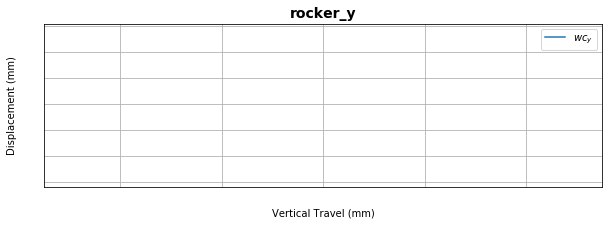

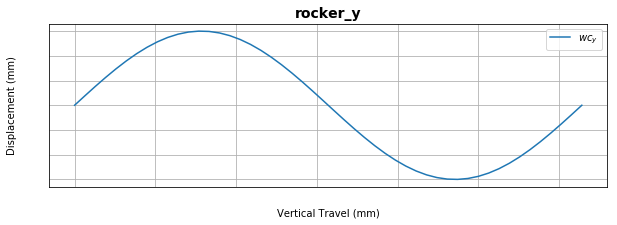

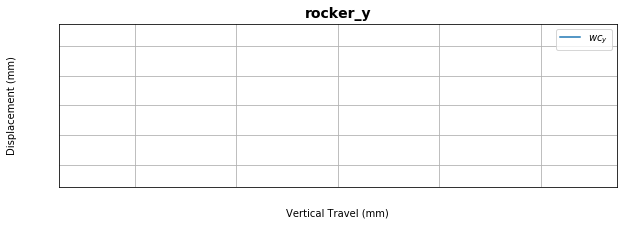

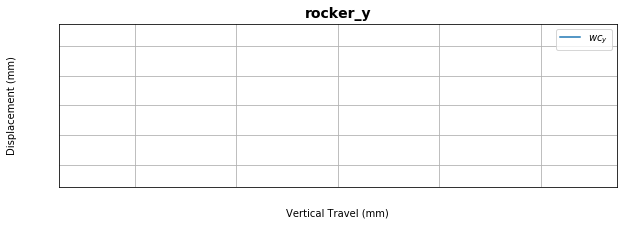

In [5]:
figsize=(10,3)
plt.figure('rocker_y',figsize=figsize)
plt.title('rocker_y', fontsize=14, fontweight='bold')
plt.plot(steer_actuator.pos_array,pos_df['rbr_rocker.y'][1:],label=r'$wc_{y}$')
plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Vertical Travel (mm)')
plt.ylabel('Displacement (mm)')
plt.grid()
plt.show()

plt.figure('',figsize=figsize)
plt.title('rocker_y', fontsize=14, fontweight='bold')
plt.plot(t,steer_actuator.pos_array,label=r'$wc_{y}$')
plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Vertical Travel (mm)')
plt.ylabel('Displacement (mm)')
plt.grid()
plt.show()

plt.figure('s',figsize=figsize)
plt.title('rocker_y', fontsize=14, fontweight='bold')
plt.plot(steer_actuator.pos_array,vel_df['rbr_rocker.y'][1:],label=r'$wc_{y}$')
plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Vertical Travel (mm)')
plt.ylabel('Displacement (mm)')
plt.grid()
plt.show()

plt.figure('sss',figsize=figsize)
plt.title('rocker_y', fontsize=14, fontweight='bold')
plt.plot(steer_actuator.pos_array,acc_df['rbr_rocker.y'][1:],label=r'$wc_{y}$')
plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xlabel('Vertical Travel (mm)')
plt.ylabel('Displacement (mm)')
plt.grid()
plt.show()

In [33]:
steering.data_graph.remove_node('jcl_left_rocker_coupler')

In [34]:
steering.show_data_flow()

Output()

In [9]:
import sympy as sy
sy.init_printing(True)

In [13]:
t=sy.Symbol('t')
theta=sy.Function('theta')(t)
sy.cos(theta)

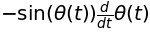

In [19]:
sy.diff(sy.cos(theta),t,1)

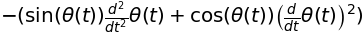

In [20]:
sy.diff(sy.cos(theta),t,2)